# **CPD ANALYSIS MANIPULATION, PREPROCESSING, VISUALIZATION, AND MACHINE LEARNING**

This tutorial uses CPD Analysis dataset to demonstrate the complete pipeline of machine learning classifier development. It consists of sections as listed below:

*   data loading
*   data manipulation
*   data visualization
*   data pre-processing
*   data splitting and transformation
*   machine learning model development
*   model evaluation
*   clustering

## **1: LOADING DATA FROM EXCEL**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [2]:
#LOADING DATA
from google.colab import files
uploaded = files.upload()

Saving CPD for rpm and colab.xlsx to CPD for rpm and colab.xlsx


In [3]:
#READ DATA
df = pd.read_excel(io.BytesIO(uploaded['CPD for rpm and colab.xlsx']))

In [4]:
df.head()

,Klasifikasi,TajukLatihan,Tempat Latihan,Jumlah Jam,Jabatan,SkorPenilaian,Skor Klasifikasi
0,PBP,WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER ED...,PLATFORM DALAM TALIAN: ZOOM & YOUTUBE,3,FAKULTI SAINS KOMPUTER DAN TEKNOLOGI MAKLUMAT,4.776,High
1,PBP,WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER ED...,PLATFORM DALAM TALIAN: ZOOM & YOUTUBE,3,SEKOLAH PERNIAGAAN DAN EKONOMI,4.776,High
2,PBP,WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER ED...,PLATFORM DALAM TALIAN: ZOOM & YOUTUBE,3,FAKULTI EKOLOGI MANUSIA,4.776,High
3,PBP,WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER ED...,PLATFORM DALAM TALIAN: ZOOM & YOUTUBE,3,FAKULTI BIOTEKNOLOGI DAN SAINS BIOMOLEKUL,4.776,High
4,PBP,WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER ED...,PLATFORM DALAM TALIAN: ZOOM & YOUTUBE,3,FAKULTI SAINS,4.776,High


In [5]:
df.tail()

,Klasifikasi,TajukLatihan,Tempat Latihan,Jumlah Jam,Jabatan,SkorPenilaian,Skor Klasifikasi
1313,CPD,KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB),"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT,...",3,FAKULTI KEJURUTERAAN,4.078,Low
1314,CPD,KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB),"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT,...",3,PUSAT PEMBANGUNAN AKADEMIK,4.078,Low
1315,CPD,KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB),"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT,...",3,FAKULTI REKABENTUK DAN SENIBINA,4.078,Low
1316,CPD,KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB),"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT,...",3,FAKULTI KEJURUTERAAN,4.078,Low
1317,CPD,KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB),"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT,...",3,FAKULTI REKABENTUK DAN SENIBINA,4.078,Low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Klasifikasi       1318 non-null   object 
 1   TajukLatihan      1318 non-null   object 
 2   Tempat Latihan    1318 non-null   object 
 3   Jumlah Jam        1318 non-null   int64  
 4   Jabatan           1318 non-null   object 
 5   SkorPenilaian     1318 non-null   float64
 6   Skor Klasifikasi  1318 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 72.2+ KB


## **2: DATA WRANGLING**

In [7]:
df = df.replace({"Klasifikasi":  {"PBP":1,"KAP":2, "CPD":3}})

In [8]:
df = df.replace({"TajukLatihan":  {"FORUM BULAN PENDIDIK I - UNIVERSITY FOR SOCIETY":1,"FORUM BULAN PENDIDIK II - KECEMERLANGAN PERTANIAN MELAHIRKAN USAHAWAN":2, "KURSUS ASAS PENGAJARAN (KAP) SIRI 1/2020":3, "KURSUS CREATING INTERACTIVE CONTENT WITH H5P":4, "KURSUS ASAS PENGAJARAN (KAP) SIRI 2/2020":5, "KURSUS DEVELOPING WINNING TEACHING E-PORTFOLIO FOR ACADEMICS":6, "KURSUS EDUCATIONAL RESEARCH DESIGN":7, "KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB)":8,"KURSUS PUTRABLAST V3.8 (SIRI 2 - FBMK & FSKTM)":9,"KURSUS PUTRABLAST V3.8 (SIRI 3 - FEP & FPP)":10,"KURSUS PUTRABLAST V3.8 (SIRI 4 - FEM & FS)":11,"KURSUS PUTRABLAST V3.8 (SIRI 5 - FBSB & FSTM)":12,"KURSUS PUTRABLAST V3.8 (SIRI 6 - FH & FPAS)":13,"KURSUS PUTRABLAST V3.8 (SIRI 7 - FP & FBMK)":14,"KURSUS SISTEM PUTRABLAST V3.8 (SIRI 8 - FPSK & FPV)":15,"KURSUS SISTEM PUTRABLAST V3.8 (SIRI 9 - FSPM, UPMKB)":16,"KURSUS VISUAL MESSAGE DESIGN: CRAFTING INFOGRAPHICS FOR PRESENTATIONS":17,"MAJLIS PERASMIAN & ASPIRASI NC SEMPENA BULAN PENDIDIK UPM 2020":18,"PERTANDINGAN AMALAN TERBAIK INOVASI P&P ANTARA FAKULTI/ PUSAT PENGAJIAN UPM 2020":19,"PUTRAFLEX: KURIKULUM FLEKSIBEL UPM":20, "SESI PERKONGSIAN AMALAN TERBAIK PELAKSANAAN PUTRAMOOC":21, "SESI PERKONGSIAN AMALAN TERBAIK SULAM@UPM":22, "SESI PERKONGSIAN INOVASI P&P DARIPADA PENYELIDIKAN GIPP":23, "WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER EDUCATION TEACHING AND LEARNING & MAJLIS PENUTUPAN BULAN PENDIDIK UPM 2020":24, "WEBINAR - REIMAGINE AND REDESIGN ONLINE LEARNING EXPERIENCE":25}})

In [9]:
df = df.replace({"Tempat Latihan":  {"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT, UPM":1,"DEWAN SEMINAR AL-FARABI, FEM, UPM":2, "MAKMAL D ICT, UPMKB":3, "PLATFORM DALAM TALIAN: ZOOM & YOUTUBE":4, "PLATFORM DALAM TALIAN: ZOOM MEETING":5, "PUTRA LEARNING SPACE (PLS), CADE, UPM":6}})

In [10]:
df = df.replace({"Jabatan":  {"BAHAGIAN HAL EHWAL PELAJAR":1,"FAKULTI BAHASA MODEN DAN KOMUNIKASI":2, "FAKULTI BIOTEKNOLOGI DAN SAINS BIOMOLEKUL":3,  "FAKULTI EKOLOGI MANUSIA":4,  "FAKULTI KEJURUTERAAN":5,  "FAKULTI PENGAJIAN ALAM SEKITAR":6,  "FAKULTI PENGAJIAN PENDIDIKAN":7, "FAKULTI PERHUTANAN DAN ALAM SEKITAR":8,  "FAKULTI PERTANIAN":9,  "FAKULTI PERUBATAN DAN SAINS KESIHATAN":10,  "FAKULTI PERUBATAN VETERINAR":11, "FAKULTI REKABENTUK DAN SENIBINA":12,  "FAKULTI SAINS":13,  "FAKULTI SAINS DAN TEKNOLOGI MAKANAN":14,  "FAKULTI SAINS KOMPUTER DAN TEKNOLOGI MAKLUMAT":15, "INSTITUT KAJIAN PERLADANGAN":16, "JABATAN CANSELERI":17, "JABATAN SAINS DAN TEKNOLOGI":18, "JABATAN SAINS HAIWAN DAN PERIKANAN":19, "JABATAN SAINS PERHUTANAN":20, "JABATAN SAINS SOSIAL DAN PENGURUSAN":21, "JABATAN SAINS TANAMAN":22, "PUSAT ASASI SAINS PERTANIAN":23, "PUSAT ISLAM":24,"PUSAT PEMAJUAN KOMPETENSI BAHASA":25,"PUSAT PEMBANGUNAN AKADEMIK":26,"PUSAT PEMBANGUNAN MAKLUMAT DAN KOMUNIKASI":27,"PUSAT TRANSFORMASI KOMUNITI UNIVERSITI":28,"SEKOLAH PERNIAGAAN DAN EKONOMI":29}})

In [11]:
df = df.replace({"Skor Klasifikasi":  {"High":1,"Middle":2, "Low":3}})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Klasifikasi       1318 non-null   int64  
 1   TajukLatihan      1318 non-null   int64  
 2   Tempat Latihan    1318 non-null   int64  
 3   Jumlah Jam        1318 non-null   int64  
 4   Jabatan           1318 non-null   int64  
 5   SkorPenilaian     1318 non-null   float64
 6   Skor Klasifikasi  1318 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 72.2 KB


In [13]:
df.tail()

,Klasifikasi,TajukLatihan,Tempat Latihan,Jumlah Jam,Jabatan,SkorPenilaian,Skor Klasifikasi
1313,3,8,1,3,5,4.078,3
1314,3,8,1,3,26,4.078,3
1315,3,8,1,3,12,4.078,3
1316,3,8,1,3,5,4.078,3
1317,3,8,1,3,12,4.078,3


In [14]:
#describe function to check statistical information about our dataset
df.describe()

,Klasifikasi,TajukLatihan,Tempat Latihan,Jumlah Jam,Jabatan,SkorPenilaian,Skor Klasifikasi
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,1.506829,16.003035,3.540971,4.911229,12.753414,4.714821,1.376328
std,0.828240,7.744594,1.255296,9.145936,7.378932,0.192240,0.643489
min,1.000000,1.000000,1.000000,2.000000,1.000000,4.054000,1.000000
25%,1.000000,10.000000,4.000000,2.000000,8.000000,4.769000,1.000000
50%,1.000000,18.000000,4.000000,2.000000,10.000000,4.789000,1.000000
75%,2.000000,22.000000,4.000000,3.000000,16.750000,4.789000,2.000000
max,3.000000,25.000000,6.000000,42.000000,29.000000,4.818000,3.000000


## **3: DATA VISUALIZATION**

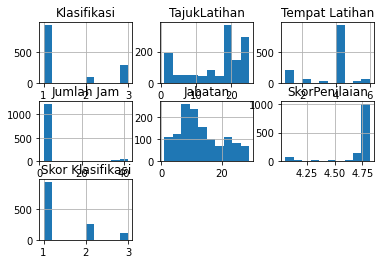

In [15]:
# histograms
df.hist()
plt.show()

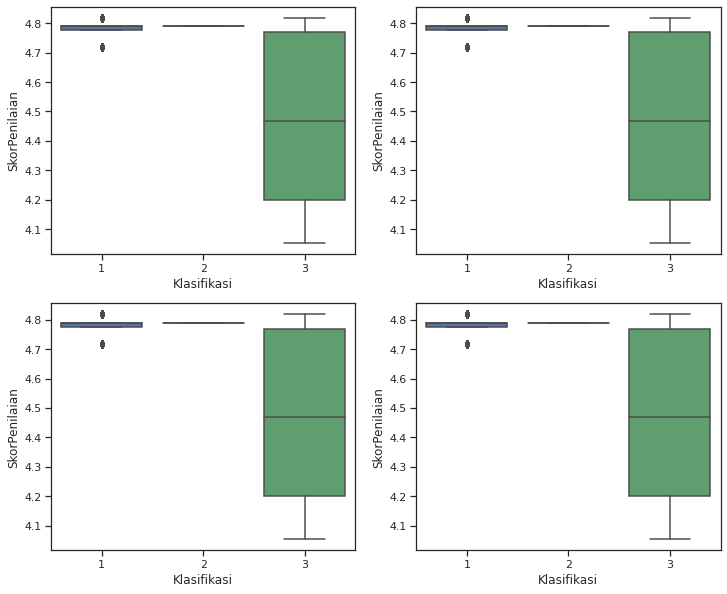

In [16]:
#lets visualize the boxplot using Seaborn library
# Box plot, also known as a box and whisker plot, displays a summary of a large amount of data 
# in five numbers — minimum, lower quartile(25th percentile), median(50th percentile), upper quartile(75th percentile) 
# and maximum data values.

sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.show()

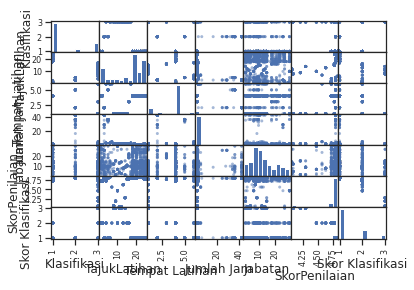

In [17]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


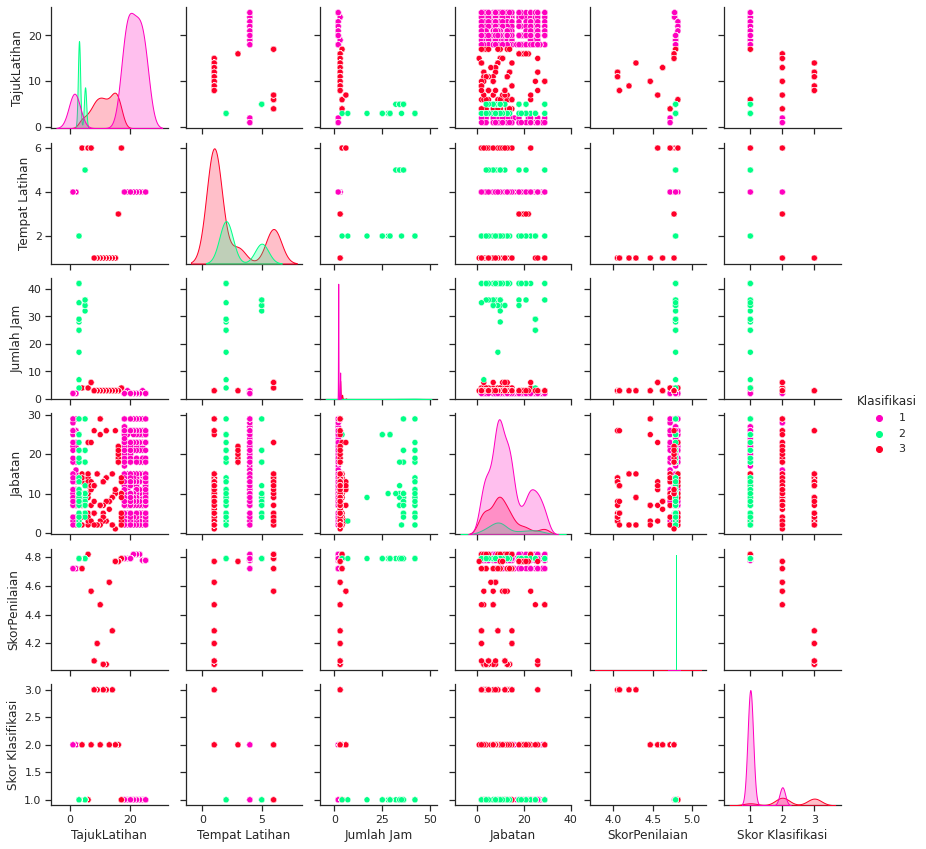

In [18]:
sns.pairplot(df, hue="Klasifikasi", height = 2, palette = 'gist_rainbow_r');

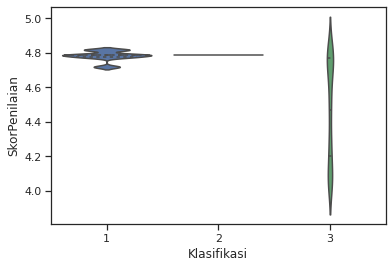

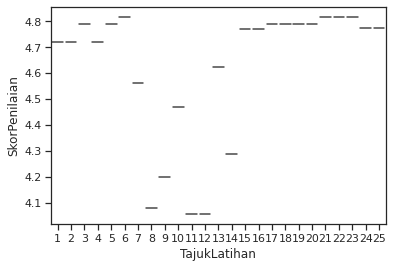

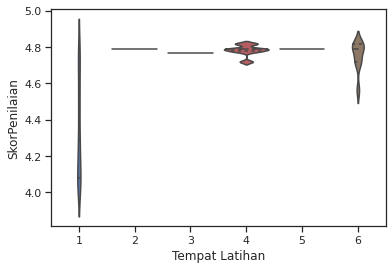

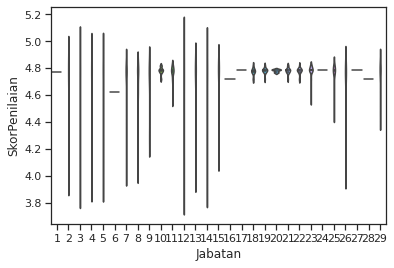

In [19]:
g = sns.violinplot(y='SkorPenilaian', x='Klasifikasi', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SkorPenilaian', x='TajukLatihan', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SkorPenilaian', x='Tempat Latihan', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SkorPenilaian', x='Jabatan', data=df, inner='quartile')
plt.show()

Text(0.5, 1.0, 'Correlation On CPD Classes')

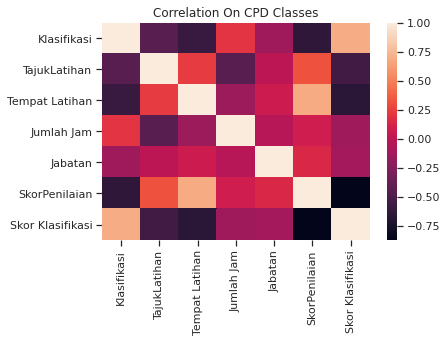

In [20]:
plt.figure(1)
sns.heatmap(df.corr())
plt.title('Correlation On CPD Classes')

## **4: CLASSIFICATION**

In [22]:
#Lets split the data into train and test set
X = df[['Klasifikasi','TajukLatihan', 'Tempat Latihan', 'Jumlah Jam', 'Jabatan' ]]
y = df['Skor Klasifikasi']

Test size = 0.7

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [24]:
#import the classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**DECISION TREE**

In [25]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))


Decision Tree:
Accuracy = 89.27%


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('mod_dt', mod_dt)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      mod_dt__criterion=criterion,
                      mod_dt__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('mod_dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               

In [27]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['mod_dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['mod_dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['mod_dt'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 5

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [28]:
mod_dt = DecisionTreeClassifier(max_depth = 6, random_state = 1, criterion="gini")
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Decision Tree:
Accuracy = 97.18%


**RANDOM FOREST**

In [56]:
from sklearn.ensemble import RandomForestClassifier
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
print('Random Forest Model:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest Model:
Accuracy = 95.34%


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('RandomF', RandomF)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      RandomF__criterion=criterion,
                      RandomF__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('RandomF',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               cl

In [58]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['RandomF__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['RandomF__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['RandomF'])

Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 4

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [59]:
RandomF = RandomForestClassifier(max_depth = 4, random_state = 1, criterion="gini")
RandomF.fit(X_train,y_train)
y_pred=RandomF.predict(X_test)
print('Random Forest:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest:
Accuracy = 96.42%


Test size = 0.5

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [43]:
#import the classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Decision Tree**

In [61]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Decision Tree:
Accuracy = 89.38%


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('mod_dt', mod_dt)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      mod_dt__criterion=criterion,
                      mod_dt__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('mod_dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               

In [46]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['mod_dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['mod_dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['mod_dt'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 5

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [47]:
mod_dt = DecisionTreeClassifier(max_depth = 6, random_state = 1, criterion="gini")
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Decision Tree:
Accuracy = 96.66%


**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
print('Random Forest Model:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest Model:
Accuracy = 93.93%


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('RandomF', RandomF)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      RandomF__criterion=criterion,
                      RandomF__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('RandomF',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               cl

In [65]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['RandomF__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['RandomF__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['RandomF'])

Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 4

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [66]:
RandomF = RandomForestClassifier(max_depth = 4, random_state = 1, criterion="gini")
RandomF.fit(X_train,y_train)
y_pred=RandomF.predict(X_test)
print('Random Forest:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest:
Accuracy = 96.51%


In [67]:
#Lets compare several machine learning models

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn (on training set)
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

CART: 0.992424 (0.010164)
RF: 0.996970 (0.006061)


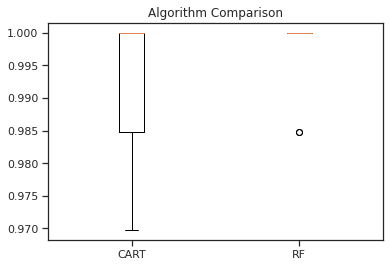

In [68]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [69]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [70]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9817905918057663
[[462   0   0]
 [  6 131   1]
 [  3   2  54]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       462
           2       0.98      0.95      0.97       138
           3       0.98      0.92      0.95        59

    accuracy                           0.98       659
   macro avg       0.98      0.95      0.97       659
weighted avg       0.98      0.98      0.98       659



## **5. CLUSTERING**

### **5.1 Clustering**

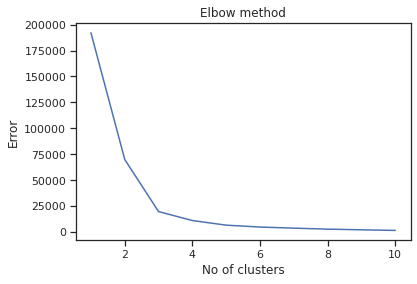

In [71]:
x = df.iloc[:, [0, 1, 2, 3]].values

#USING ELBOW METHOD to identify the best k-value
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [72]:
#let us predict using kmeans=3
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 2 2 2]


array([[ 1.22757112, 20.64442013,  3.8107221 ,  2.3238512 ],
       [ 2.        ,  3.65934066,  2.98901099, 38.03296703],
       [ 2.17891374,  6.03833866,  2.91373802,  2.8370607 ]])

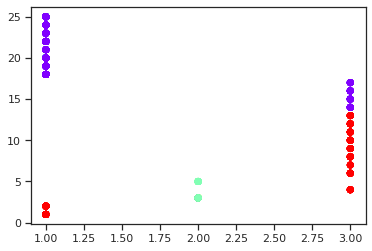

In [73]:
#visualizing clustering
plt.scatter(x[:,0], x[:,1],c=y_kmeans3, cmap='rainbow')

### **5.2 Clustering**

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = df.iloc[:, [0, 1, 2, 3, 4]].values
x

array([[ 1, 24,  4,  3, 15],
       [ 1, 24,  4,  3, 29],
       [ 1, 24,  4,  3,  4],
       ...,
       [ 3,  8,  1,  3, 12],
       [ 3,  8,  1,  3,  5],
       [ 3,  8,  1,  3, 12]])

In [ ]:
df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Klasifikasi       1318 non-null   int64  
 1   TajukLatihan      1318 non-null   int64  
 2   Tempat Latihan    1318 non-null   int64  
 3   Jumlah Jam        1318 non-null   int64  
 4   Jabatan           1318 non-null   int64  
 5   SkorPenilaian     1318 non-null   float64
 6   Skor Klasifikasi  1318 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 72.2 KB


,Klasifikasi,TajukLatihan,Tempat Latihan,Jumlah Jam,Jabatan,SkorPenilaian,Skor Klasifikasi
0,1,24,4,3,15,4.776,1
1,1,24,4,3,29,4.776,1
2,1,24,4,3,4,4.776,1
3,1,24,4,3,3,4.776,1
4,1,24,4,3,13,4.776,1
5,1,24,4,3,13,4.776,1
6,1,24,4,3,10,4.776,1
7,1,24,4,3,19,4.776,1
8,1,24,4,3,2,4.776,1
9,1,24,4,3,5,4.776,1


In [ ]:
#Frequency distribution of species"
df_outcome = pd.crosstab(index=df["Skor Klasifikasi"],  # Make a crosstab
                              columns="count") # Name the count column

In [ ]:
High =df.loc[df["Skor Klasifikasi"]=="High"]
Medium =df.loc[df["Skor Klasifikasi"]=="Middle"]
Low =df.loc[df["Skor Klasifikasi"]=="Low"]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

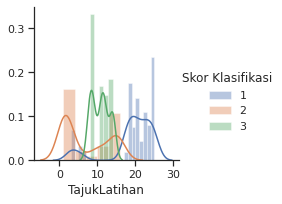

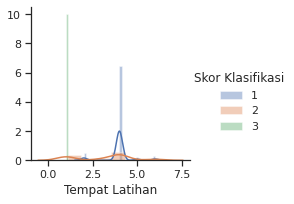

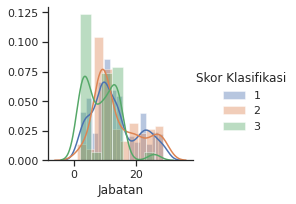

In [ ]:
sns.FacetGrid(df,hue="Skor Klasifikasi",size=3).map(sns.distplot,"TajukLatihan").add_legend()
sns.FacetGrid(df,hue="Skor Klasifikasi",size=3).map(sns.distplot,"Tempat Latihan").add_legend()
sns.FacetGrid(df,hue="Skor Klasifikasi",size=3).map(sns.distplot,"Jabatan").add_legend()
plt.show()

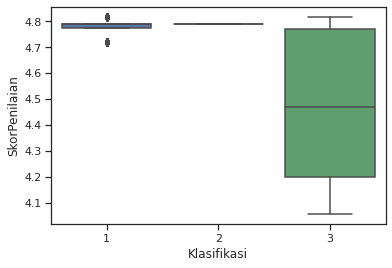

In [ ]:
sns.boxplot(x="Klasifikasi",y="SkorPenilaian",data=df)
plt.show()

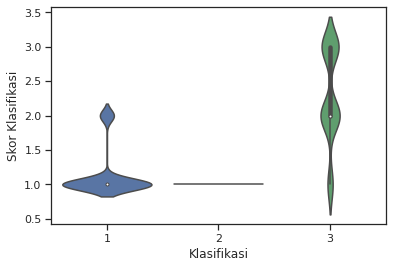

In [ ]:
sns.violinplot(x="Klasifikasi",y="Skor Klasifikasi",data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


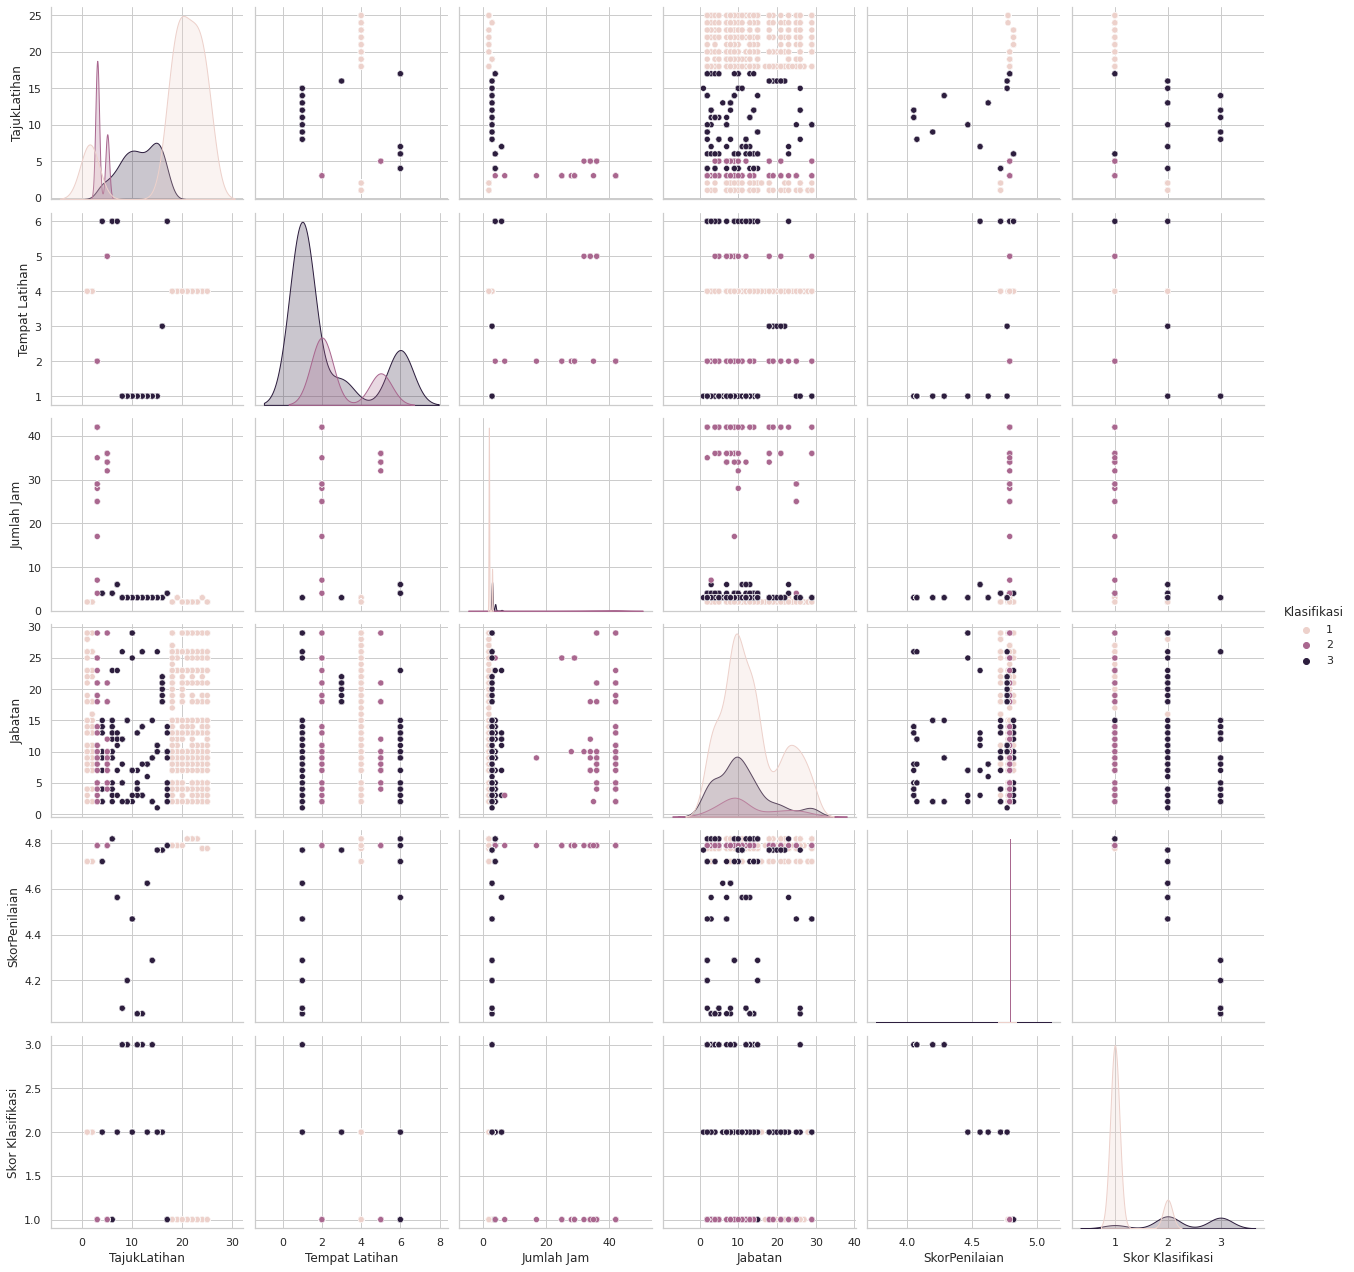

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Klasifikasi",size=3);
plt.show()

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

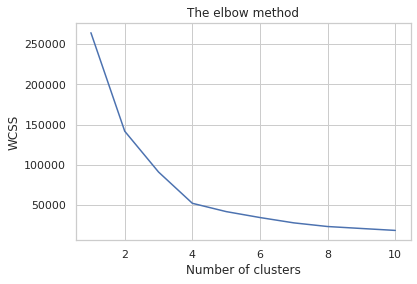

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

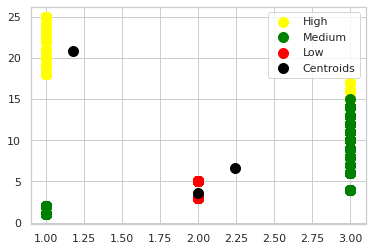

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'High')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Medium')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Low')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

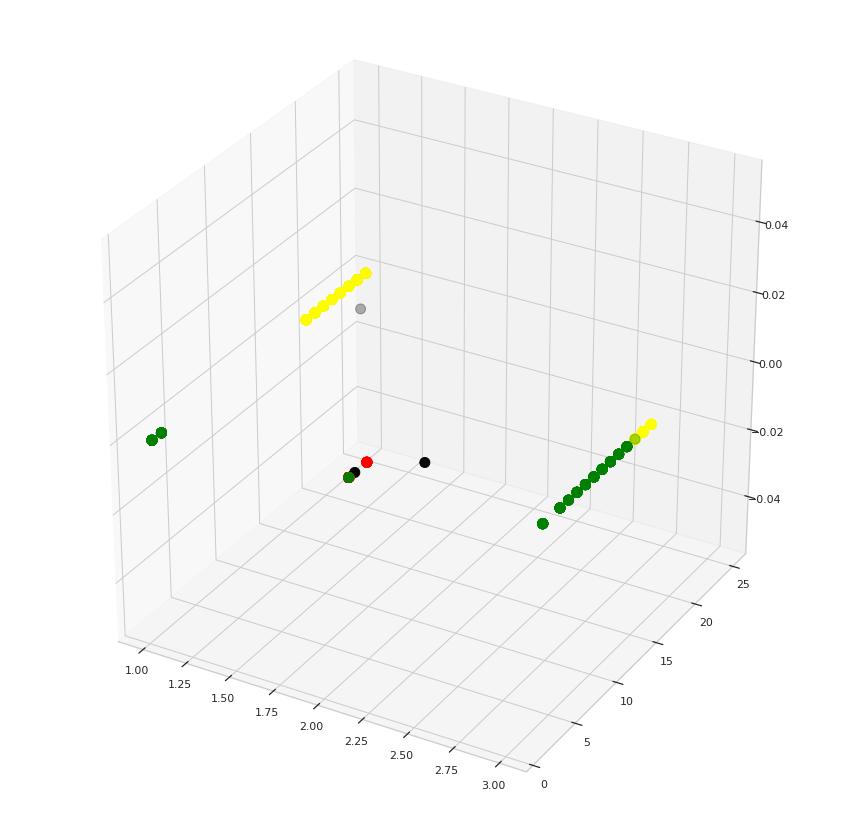

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'High')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Medium')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Low')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

### **5.3 Clustering**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

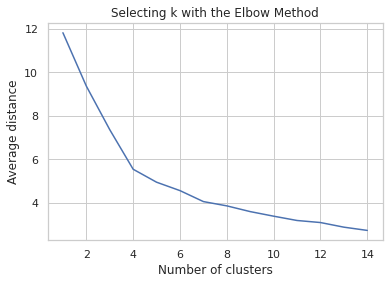

In [ ]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    clusassign=model.predict(df)
    meandist.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1))
    / df.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear


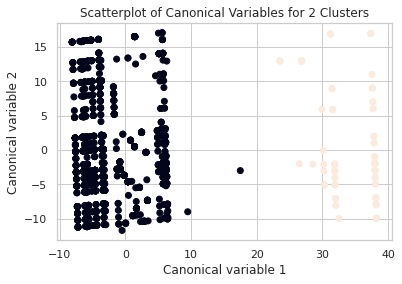

In [ ]:
# Here we are just analyzing if we consider 2 cluster instead of 3 by using PCA 
model3=KMeans(n_clusters=2)
model3.fit(df) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(df)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(df) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) 
# plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# close or overlapping clusters idicate correlated variables with low in-class variance 
# but not good separation. 2 cluster might be better.

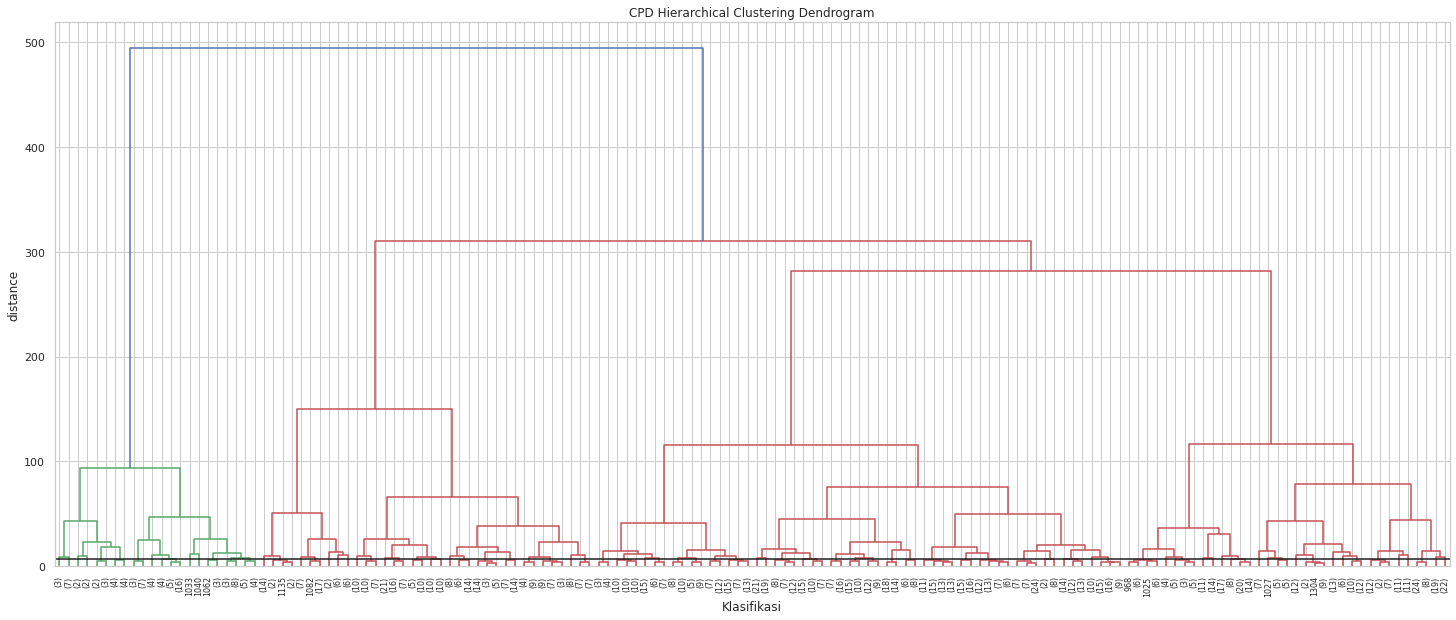

In [ ]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('CPD Hierarchical Clustering Dendrogram')
plt.xlabel('Klasifikasi')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

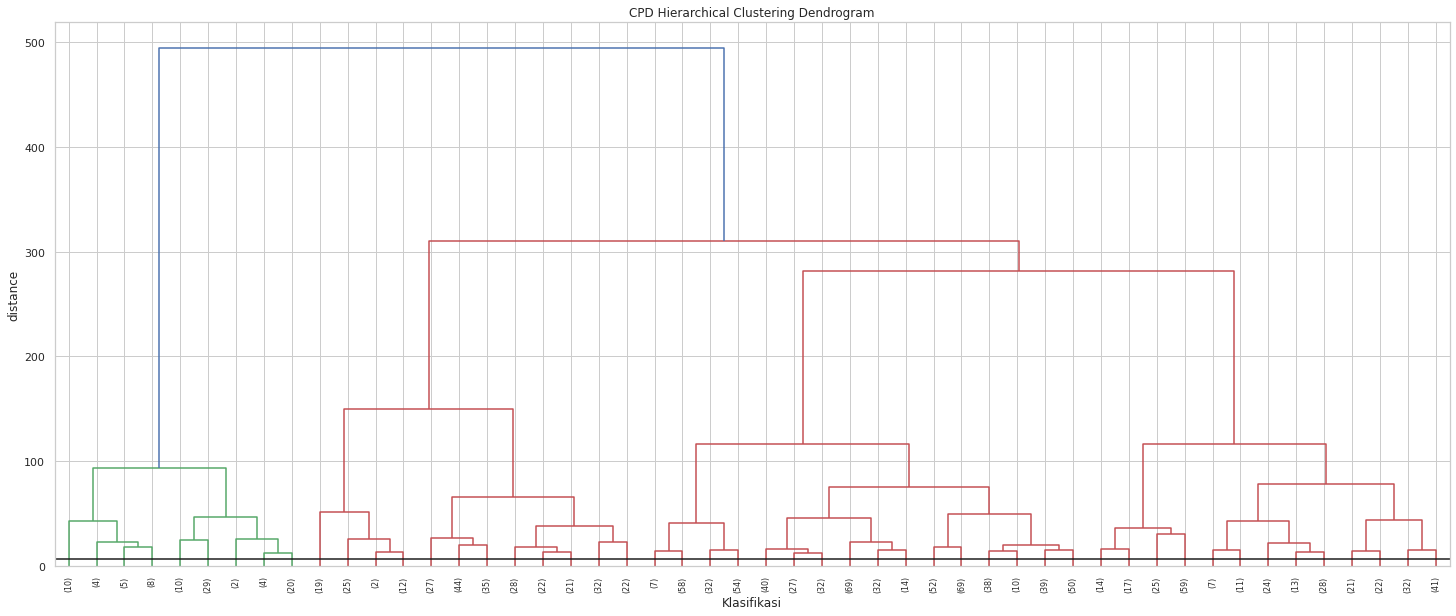

In [ ]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('CPD Hierarchical Clustering Dendrogram')
plt.xlabel('Klasifikasi')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()